## Precision, Recall, F-measure, Support

- **Precision** = tp / (tp + fp)

- **Recall** = tp / (tp + fn)

- **F1** = 2 * (precision * recall) / (precision + recall)

- **Support** = Number of cases on each class


Precision, Recall and therefore F-measure depend on the probability threshold utilised to determine the class output.

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# from sklearn.utils import _safe_indexing as safe_indexing

from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    precision_recall_fscore_support,
)

from yellowbrick.classifier import (
    ClassificationReport,
    DiscriminationThreshold,
)

import warnings
warnings.filterwarnings("ignore")

## Load data

In [52]:
# load data
data = pd.read_csv('../kdd2004.csv')

# remap target class to 0 and 1
# data['target'] = data['target'].map({-1:0, 1:1})
data['target'] = data['target'].replace({-1:0, 1:1})

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0


In [53]:
# data size

data.shape

(145751, 75)

In [54]:
# imbalanced target

data.target.value_counts() / len(data)

target
0    0.991108
1    0.008892
Name: count, dtype: float64

In [55]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    stratify=data['target'],
    random_state=0)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

In [56]:
print(y_train.mean())
print(y_test.mean())

0.00888997794658172
0.008896308832273705


## Baseline: predict the majority class

In [57]:
# Baseline prediction: predict the majority class

y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

## Train ML models

### Random Forests

In [58]:
rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=2, n_jobs=4)

rf.fit(X_train, y_train)

y_train_rf = rf.predict_proba(X_train)[:,1]
y_test_rf = rf.predict_proba(X_test)[:,1]

### Logistic Regression

In [59]:
logit = LogisticRegression(random_state=0,  max_iter=1000)

logit.fit(X_train, y_train)

y_train_logit = logit.predict_proba(X_train)[:,1]
y_test_logit = logit.predict_proba(X_test)[:,1]

## Precision

In [60]:
print('Precision Baseline test: ', precision_score(y_test, y_test_base))
print('Precision Random Forest test:', precision_score(y_test, rf.predict(X_test)))
print('Precision Logistic Regression test:', precision_score(y_test, logit.predict(X_test)))

Precision Baseline test:  0.0
Precision Random Forest test: 0.9915254237288136
Precision Logistic Regression test: 0.951048951048951


## Recall

In [61]:
print('Recall Baseline test: ', recall_score(y_test, y_test_base, pos_label=1))
print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test), pos_label=1))
print('Recall Logistic Regression test:', recall_score(y_test, logit.predict(X_test), pos_label=1))

Recall Baseline test:  0.0
Recall Random Forest test: 0.6015424164524421
Recall Logistic Regression test: 0.699228791773779


## F-measure or F1 score

In [62]:
print('F-measure Baseline test: ', f1_score(y_test, y_test_base, pos_label=1))
print('F-measure Random Forest test:', f1_score(y_test, rf.predict(X_test), pos_label=1))
print('F-measure Logistic Regression test:', f1_score(y_test, logit.predict(X_test), pos_label=1))

F-measure Baseline test:  0.0
F-measure Random Forest test: 0.7487999999999999
F-measure Logistic Regression test: 0.8059259259259259


## All metrics - 1 function

We can obtain all metrics, for the majority and minority class at the same time, with this function:

- [precision_recall_fscore_support](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)

In [63]:
precision, recall, fscore, support = precision_recall_fscore_support(
    y_test, rf.predict(X_test), pos_label=1,
)

print('Random Forests Precision: ', precision)
print('Random Forests Recall: ', recall)
print('Random Forests f-score: ', fscore)
print('Support: ', support)

Random Forests Precision:  [0.99643596 0.99152542]
Random Forests Recall:  [0.99995385 0.60154242]
Random Forests f-score:  [0.99819181 0.7488    ]
Support:  [43337   389]


The first element in each list corresponds to the metrics for the majority class, the second element in each list corresponds to the metrics for the minority class (see that they coincide with those values obtained when we calculated the metrics individually).

See also that they match with the values obtained with Yellobrick below:

## Full classification report

https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

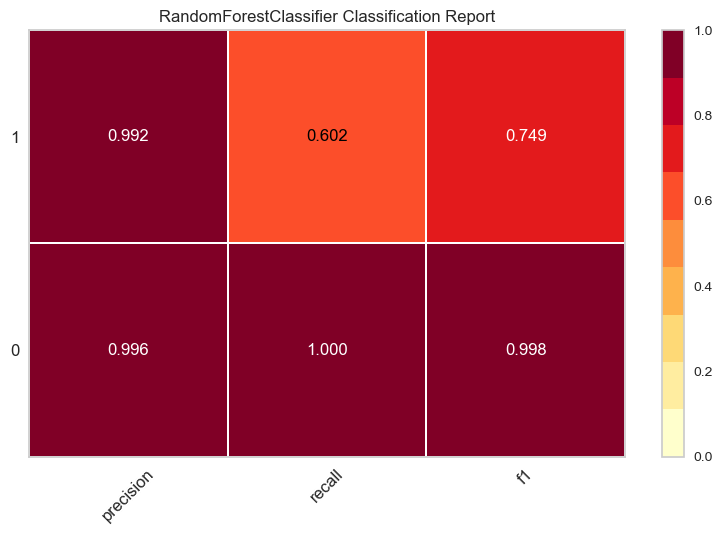

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [64]:
visualizer = ClassificationReport(rf)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

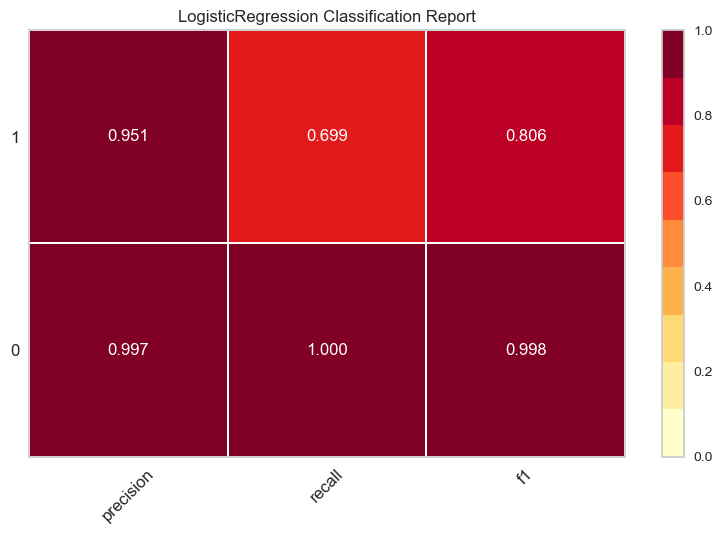

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [65]:
visualizer = ClassificationReport(logit)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

# Precision and Recall, vs probability threshold

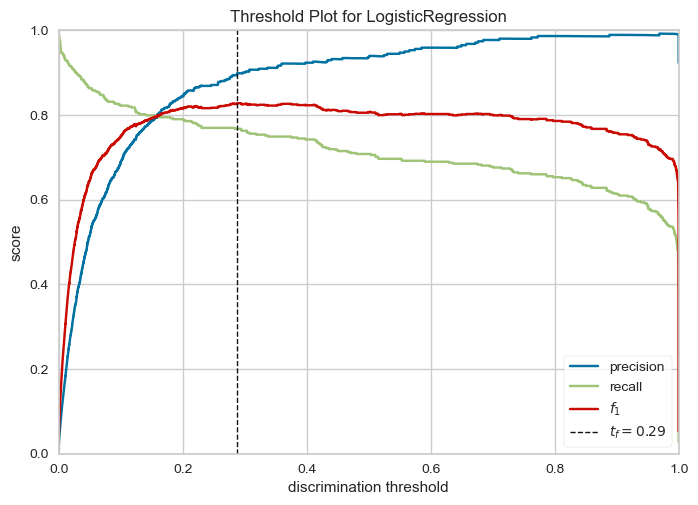

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [66]:
visualizer = DiscriminationThreshold(logit,
                                     n_trials=1,
                                     cv=0.5,
                                     argmax='fscore',
                                     random_state=0,
                                     is_fitted='auto',
                                     exclude = "queue_rate")

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

In [67]:
# omd
from xgboost import XGBClassifier

weight = len(y_test[y_test==0]) / len(y_test[y_test==1])
weight=100
weight=10
# weight=1
params = {
    'booster':'gbtree',  
    'scale_pos_weight':weight, 
    'max_depth':6, 
    'learning_rate':0.1, 
    'n_estimators':100,
}

xgb = XGBClassifier(**params, objective='binary:logistic', random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [68]:
from sklearn import metrics

print(metrics.classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43337
           1       0.92      0.80      0.85       389

    accuracy                           1.00     43726
   macro avg       0.96      0.90      0.93     43726
weighted avg       1.00      1.00      1.00     43726



In [69]:
precision, recall, fscore, support = precision_recall_fscore_support(
    y_test, xgb.predict(X_test), pos_label=1,
)

print('XGBoost Precision: ', precision)
print('XGBoost Recall: ', recall)
print('XGBoost f-score: ', fscore)
print('Support: ', support)

XGBoost Precision:  [0.99817926 0.91988131]
XGBoost Recall:  [0.99937698 0.79691517]
XGBoost f-score:  [0.99877776 0.85399449]
Support:  [43337   389]


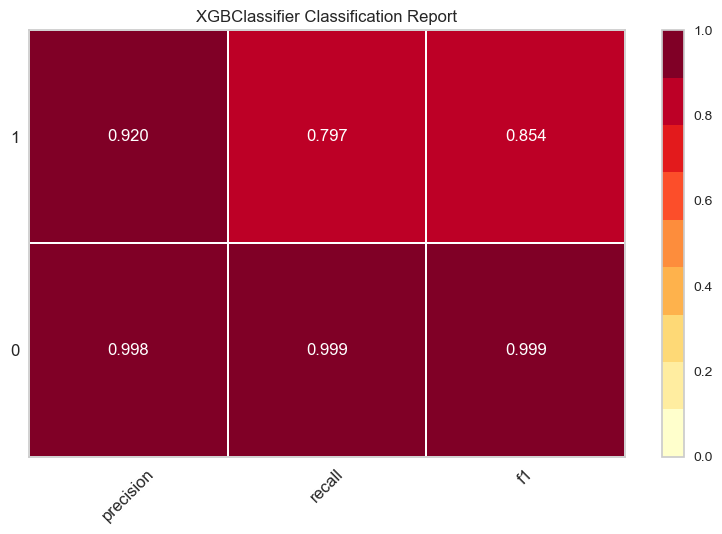

<Axes: title={'center': 'XGBClassifier Classification Report'}>

In [70]:
visualizer = ClassificationReport(xgb)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

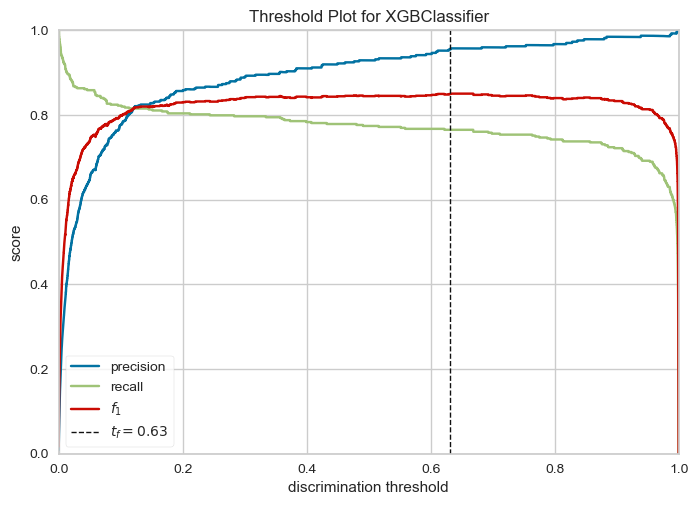

<Axes: title={'center': 'Threshold Plot for XGBClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [71]:
visualizer = DiscriminationThreshold(xgb,
                                     n_trials=1,
                                     cv=0.5,
                                     argmax='fscore',
                                     random_state=0,
                                     is_fitted='auto',
                                     exclude = "queue_rate")

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

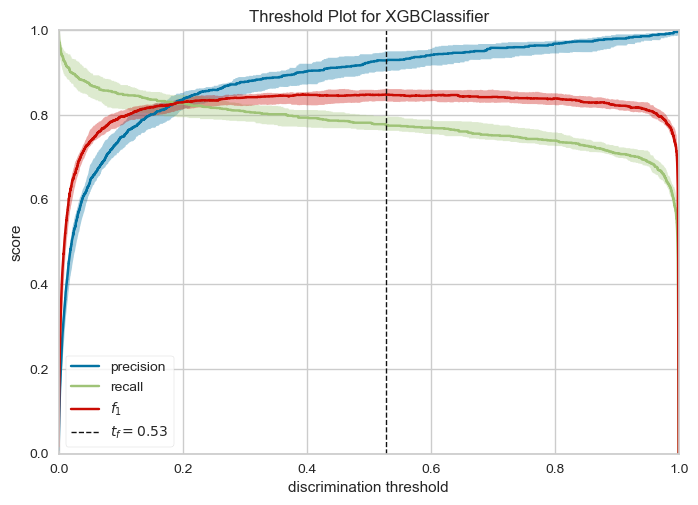

<Axes: title={'center': 'Threshold Plot for XGBClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [72]:
visualizer = DiscriminationThreshold(xgb,
                                     n_trials=10,
                                     cv=0.5,
                                     argmax='fscore',
                                     random_state=0,
                                     is_fitted='auto',
                                     exclude = "queue_rate")

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

In [83]:
def cm(model, X, y, threshold): 
    y_prob = model.predict_proba(X)[:,1]
    y_pred = (y_prob > threshold).astype(int)
    cm = metrics.confusion_matrix(y, y_pred)
    metrics.ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)
    print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43337
           1       0.92      0.80      0.86       389

    accuracy                           1.00     43726
   macro avg       0.96      0.90      0.93     43726
weighted avg       1.00      1.00      1.00     43726



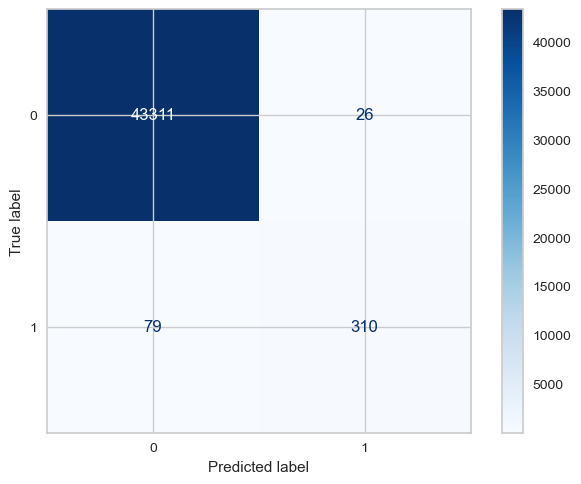

In [84]:
cm(xgb, X_test, y_test, threshold=0.51)

In [126]:
def roc_curve(model, X, y, title=None):
    auroc = metrics.roc_auc_score(y, model.predict_proba(X)[:, 1])
    fpr, tpr, thresholds = metrics.roc_curve(y, model.predict_proba(X)[:, 1])

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {auroc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2, label='Random Guess')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(title)
    plt.legend()

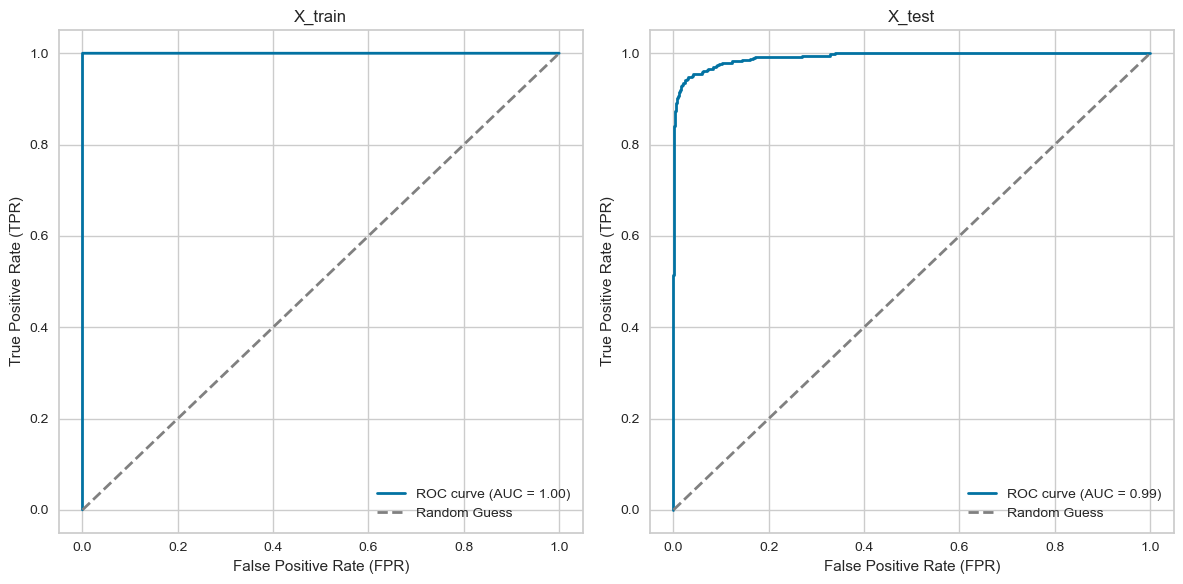

In [127]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Call roc_curve for the training set
plt.sca(ax1)  # Set the current Axes to ax1
roc_curve(xgb, X_train, y_train, title="X_train")

# Call roc_curve for the test set
plt.sca(ax2)  # Set the current Axes to ax2
roc_curve(xgb, X_test, y_test, title="X_test")

# Adjust layout and display
plt.tight_layout()
plt.show()

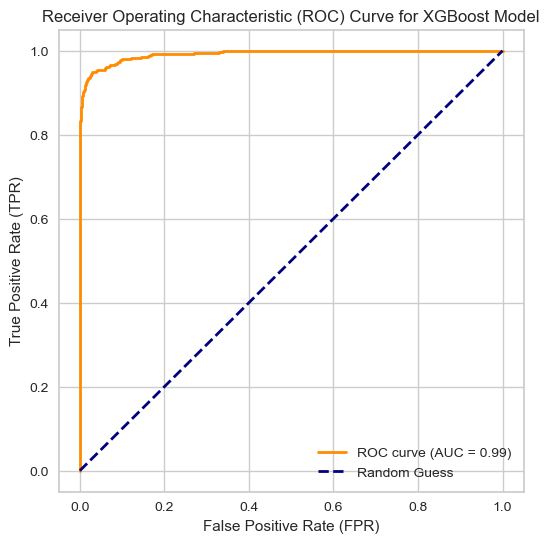

In [90]:
auroc = metrics.roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test, xgb.predict_proba(X_test)[:,1])

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auroc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost Model')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43337
           1       0.90      0.74      0.81       389

    accuracy                           1.00     43726
   macro avg       0.95      0.87      0.91     43726
weighted avg       1.00      1.00      1.00     43726



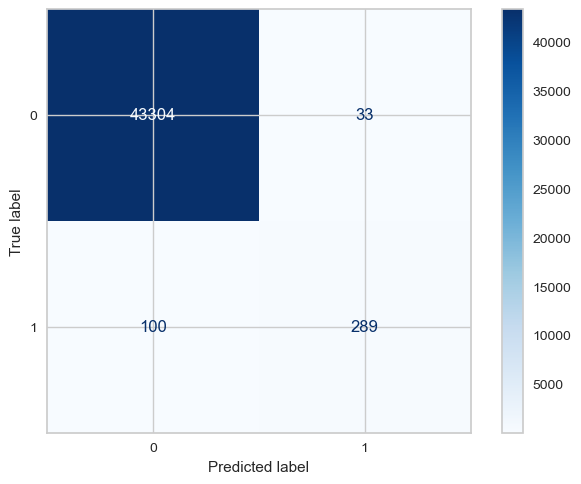

In [78]:
cm(logit, X_test, y_test, threshold=0.3)